# Name: Saara Anand
# Registration Number: 21BCE8156
# Assignment 1: House Price Prediction 

In [1]:

import numpy as np 
import pandas as pd 

# **Importing Libraries**

In [2]:
#Importing Libraries

import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objs as go

import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

# **Loading the Data**

In [3]:
#Reading the data
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/train.csv'

In [ ]:
print("shape of train data: ",train_df.shape)
print("shape of test data: ",test_df.shape)

shape of train data:  (1460, 81)
shape of test data:  (1459, 80)


In [ ]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# **HANDLING THE MISSING VALUES**

In [ ]:
print("Columns having categorical data:")
category = list(train_df.select_dtypes(include = [object]).columns)
category

Columns having categorical data:


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
print("Columns having numerical data:")
num = list(train_df.select_dtypes(include = [int,float]).columns)
num

Columns having numerical data:


['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

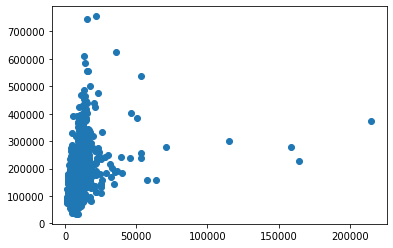

In [ ]:
x = train_df["LotArea"]
y = train_df["SalePrice"]

import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.show()

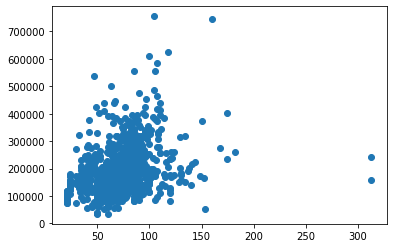

In [ ]:
x = train_df["LotFrontage"]
y = train_df["SalePrice"]

import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.show()

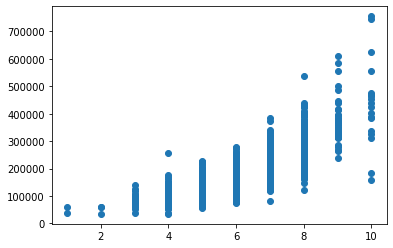

In [ ]:
x = train_df["OverallQual"]
y = train_df["SalePrice"]

import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.show()

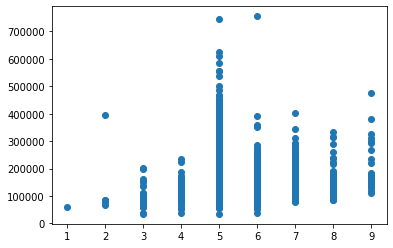

In [ ]:
x = train_df["OverallCond"]
y = train_df["SalePrice"]

import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.show()

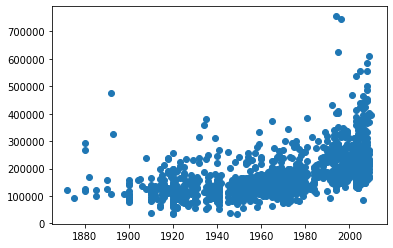

In [ ]:
x = train_df["YearBuilt"]
y = train_df["SalePrice"]

import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.show()

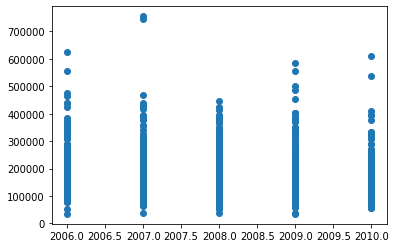

In [ ]:
x = train_df["YrSold"]
y = train_df["SalePrice"]

import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.show()

In [ ]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Replacing null values in numerical columns with the mean value of that column.**

In [ ]:
train_df['LotFrontage'].fillna(test_df['LotFrontage'].mean(),inplace = True)
train_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mean(),inplace = True)

In [ ]:
test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean(),inplace = True)
test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mean(),inplace = True)

**Filling null values in categorical columns with the highest frequency data.**

In [ ]:
train_df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [ ]:
test_df['MasVnrType'].value_counts()

None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64

In [ ]:
train_df['MasVnrType'].fillna('None',inplace = True)
test_df['MasVnrType'].fillna('None',inplace = True)

In [ ]:
train_df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [ ]:
test_df['BsmtQual'].value_counts()

TA    634
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64

In [ ]:
train_df['BsmtQual'].fillna('TA',inplace = True)
test_df['BsmtQual'].fillna('TA',inplace = True)

In [ ]:
train_df['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [ ]:
train_df['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [ ]:
train_df['BsmtCond'].fillna('TA',inplace = True)
test_df['BsmtCond'].fillna('3',inplace = True)

In [ ]:
train_df['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [ ]:
test_df['BsmtExposure'].value_counts()

No    951
Av    197
Gd    142
Mn    125
Name: BsmtExposure, dtype: int64

In [ ]:
train_df['BsmtExposure'].fillna('No',inplace = True)
test_df['BsmtExposure'].fillna('No',inplace = True)

In [ ]:
train_df['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [ ]:
test_df['BsmtFinType1'].value_counts()

GLQ    431
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
Name: BsmtFinType1, dtype: int64

In [ ]:
train_df['BsmtFinType1'].fillna('Unf',inplace = True)
test_df['BsmtFinType1'].fillna('Unf',inplace = True)

In [ ]:
train_df['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [ ]:
test_df['BsmtFinType2'].value_counts()

Unf    1237
Rec      51
LwQ      41
BLQ      35
ALQ      33
GLQ      20
Name: BsmtFinType2, dtype: int64

In [ ]:
train_df['BsmtFinType2'].fillna('Unf',inplace = True)
test_df['BsmtFinType2'].fillna('Unf',inplace = True)

In [ ]:
train_df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [ ]:
train_df['Electrical'].fillna('SBrkr',inplace = True)

In [ ]:
train_df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [ ]:
test_df['GarageType'].value_counts()

Attchd     853
Detchd     392
BuiltIn     98
Basment     17
2Types      17
CarPort      6
Name: GarageType, dtype: int64

In [ ]:
train_df['GarageType'].fillna('Attchd',inplace = True)
test_df['GarageType'].fillna('Attchd',inplace = True)

In [ ]:
train_df['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [ ]:
test_df['GarageFinish'].value_counts()

Unf    625
RFn    389
Fin    367
Name: GarageFinish, dtype: int64

In [ ]:
train_df['GarageFinish'].fillna('Unf',inplace = True)
test_df['GarageFinish'].fillna('Unf',inplace = True)

In [ ]:
train_df['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [ ]:
test_df['GarageQual'].value_counts()

TA    1293
Fa      76
Gd      10
Po       2
Name: GarageQual, dtype: int64

In [ ]:
train_df['GarageQual'].fillna('TA',inplace = True)
test_df['GarageQual'].fillna('TA',inplace = True)

In [ ]:
train_df['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [ ]:
test_df['GarageCond'].value_counts()

TA    1328
Fa      39
Po       7
Gd       6
Ex       1
Name: GarageCond, dtype: int64

In [ ]:
train_df['GarageCond'].fillna('TA',inplace = True)
test_df['GarageCond'].fillna('TA',inplace = True)

In [ ]:
train_df['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [ ]:
test_df['GarageYrBlt'].value_counts()

2005.0    77
2007.0    66
2006.0    56
2004.0    46
2003.0    42
          ..
1918.0     1
1895.0     1
1932.0     1
1916.0     1
1919.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [ ]:
train_df['GarageYrBlt'].fillna('2005',inplace = True)
test_df['GarageYrBlt'].fillna('2005',inplace = True)

In [ ]:
## Percentage of missing values in Alley,PoolQC,Fence,MiscFeature
 
d1=train_df[['Alley','PoolQC','Fence','MiscFeature']]
a=d1.isnull().sum()/len(d1)*100
a

Alley          93.767123
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

More than 80% of the data are missing in Alley,PoolQC,Fence,MiscFeature. Hence, removing those columns.

In [ ]:
#Removing the columns having null value
train_df.dropna(axis = 1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [ ]:
print("shape of train data: ",train_df.shape)
print("shape of test data: ",test_df.shape)

shape of train data:  (1460, 81)
shape of test data:  (1459, 80)


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Showing zero null values in all the columns.**

# **MODELLING**

Applying the **label encoding** on categorical data

In [ ]:
test_df = test_df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis = 1)
train_df = train_df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis = 1)

In [ ]:
test_x = test_df.drop(['Id'],axis = 1)
print("shape of test data: ",test_x.shape)

shape of test data:  (1459, 75)


In [ ]:
category_ = list(train_df.select_dtypes(include = [object]).columns)
category_t1 = list(test_x.select_dtypes(include = [object]).columns)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for t in category_:
    train_df[t] = le.fit_transform(train_df[t].astype(str))

for a in category_t1:
    test_x[a] = le.fit_transform(test_x[a].astype(str))


**Separating Independent(X) & Dependent(y) variables**

In [ ]:
X=train_df.drop(['Id','SalePrice'],axis=1) ## all the features
y=train_df['SalePrice']

In [ ]:
print("shape of X: ",X.shape)
print("shape of test data: ",test_x.shape)

shape of X:  (1460, 75)
shape of test data:  (1459, 75)


Applying different models and checking the score

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mc=MinMaxScaler()
x=mc.fit_transform(X)

In [ ]:
#Splitting the Dataset into Training set and Test Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state = 42)
print("Traning Shape = ",x_train.shape)  ## number of rows and columns  given for training
print('Testing Shape = ',x_test.shape)  ## number of row and columns given for testing

Traning Shape =  (1168, 75)
Testing Shape =  (292, 75)


**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
#Fitting the x_train and y_train on the model
lr.fit(x_train,y_train)
score = lr.score(x_test,y_test)
score



0.8472492729568867

# **FINAL MODELLING**

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
#Fitting the x_train and y_train on the model
lr.fit(x_train,y_train)
score = lr.score(x_test,y_test)
score
print("Score of the LinearRegressor for the full data: ",score)

Score of the LinearRegressor for the full data:  0.8472492729568867
